In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("glassdoor_reviews.csv")
data

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."


In [3]:
data=data[["firm","overall_rating","headline","pros","cons"]]

In [4]:
data.isnull().sum()

firm                 0
overall_rating       0
headline          2219
pros                 0
cons                 8
dtype: int64

In [5]:
data.dropna(inplace=True)

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_19788\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [6]:
data.shape

(836339, 5)

In [7]:
df=data.sample(10000,random_state=42)

In [8]:
df.shape

(10000, 5)

In [9]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")
df['sentiment'] = df['headline'].apply(lambda x: sentiment_analyzer(x)[0])

In [10]:
df

,firm,overall_rating,headline,pros,cons,sentiment
581711,Microsoft,5,"When you love what you do, work doesn't feel l...",The kind of impact we create at our clients ev...,I haven't found any so far,"{'label': 'POSITIVE', 'score': 0.5167264938354..."
139668,Citi,4,Good company to work for,Good number of vacation days,Getting to NYC is difficult,"{'label': 'POSITIVE', 'score': 0.9998759031295..."
427166,J-P-Morgan,1,Awful,It is a new building. They added furniture out...,Terrible management. Multiple violations . The...,"{'label': 'NEGATIVE', 'score': 0.9997954964637..."
677093,PwC,5,Great!!!,People Nice! Great Platform for business and c...,Work is boring unless you like doing accounting.,"{'label': 'POSITIVE', 'score': 0.9998749494552..."
70409,BNY-Mellon,3,Good company to start,Good company to start banking career\r\ngood s...,High turn over rate for employee\r\novertime i...,"{'label': 'POSITIVE', 'score': 0.9998800754547..."
...,...,...,...,...,...,...
156105,Co-op,4,Great place with good people,Understand work life balance \r\nThe business ...,Large organisation so can be lots of politics ...,"{'label': 'POSITIVE', 'score': 0.9998794794082..."
291555,Google,5,Large stable company,"Excellent culture, benefits, company as a whol...",It takes a long time to get simple things done...,"{'label': 'POSITIVE', 'score': 0.9998365640640..."
101024,Bloomberg-L-P,3,Legal Analyst,"Great benefits: Four weeks paid vacation, a c...",Limited advancement: Very flat corporate stru...,"{'label': 'POSITIVE', 'score': 0.817923903465271}"
555584,McKinsey-and-Company,4,Hello,"Responsibility, client exposure, intelligent c...",Quite a lot of hours and travel,"{'label': 'POSITIVE', 'score': 0.9995185136795..."


In [11]:
df["label"]=df["sentiment"].apply(lambda x:x.get("label"))

In [12]:
df["label"].replace({"POSITIVE":1,"NEGATIVE":0},inplace=True)
df

,firm,overall_rating,headline,pros,cons,sentiment,label
581711,Microsoft,5,"When you love what you do, work doesn't feel l...",The kind of impact we create at our clients ev...,I haven't found any so far,"{'label': 'POSITIVE', 'score': 0.5167264938354...",1
139668,Citi,4,Good company to work for,Good number of vacation days,Getting to NYC is difficult,"{'label': 'POSITIVE', 'score': 0.9998759031295...",1
427166,J-P-Morgan,1,Awful,It is a new building. They added furniture out...,Terrible management. Multiple violations . The...,"{'label': 'NEGATIVE', 'score': 0.9997954964637...",0
677093,PwC,5,Great!!!,People Nice! Great Platform for business and c...,Work is boring unless you like doing accounting.,"{'label': 'POSITIVE', 'score': 0.9998749494552...",1
70409,BNY-Mellon,3,Good company to start,Good company to start banking career\r\ngood s...,High turn over rate for employee\r\novertime i...,"{'label': 'POSITIVE', 'score': 0.9998800754547...",1
...,...,...,...,...,...,...,...
156105,Co-op,4,Great place with good people,Understand work life balance \r\nThe business ...,Large organisation so can be lots of politics ...,"{'label': 'POSITIVE', 'score': 0.9998794794082...",1
291555,Google,5,Large stable company,"Excellent culture, benefits, company as a whol...",It takes a long time to get simple things done...,"{'label': 'POSITIVE', 'score': 0.9998365640640...",1
101024,Bloomberg-L-P,3,Legal Analyst,"Great benefits: Four weeks paid vacation, a c...",Limited advancement: Very flat corporate stru...,"{'label': 'POSITIVE', 'score': 0.817923903465271}",1
555584,McKinsey-and-Company,4,Hello,"Responsibility, client exposure, intelligent c...",Quite a lot of hours and travel,"{'label': 'POSITIVE', 'score': 0.9995185136795...",1


In [13]:
import nltk
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [14]:
stemmer=PorterStemmer()

def preprocessor(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]|\d+', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words and then perform stemming
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

In [15]:
df["processed_headline"] = df["headline"].apply(preprocessor)

In [16]:
x = df['processed_headline']
y = df['label']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=25)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred))

Accuracy=  0.8445


In [21]:
review = "flexibility and career development"  # The review text you want to check

# Preprocess the review text
review_vectorized = tfidf.transform([review])

# Predict the sentiment using the trained model
sentiment = model.predict(review_vectorized)

print(sentiment)

[1]


In [22]:
company_name=input("Enter the comapny name: ")
filtered_data=data[data["firm"]==company_name]

Enter the comapny name: Google


In [23]:
filtered_data

,firm,overall_rating,headline,pros,cons
286126,Google,4,Freedom within the company and lots of things ...,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...
286127,Google,5,Work with smart people who are willing to shar...,People are willing to share knowledge which is...,A company like this requires a lot of long hou...
286128,Google,5,One of the best jobs of my life because I work...,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...
286129,Google,5,One of the best jobs of my life because I work...,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...
286130,Google,3,Working for Google has been exciting over the ...,The name recognition that goes along w/ the jo...,It is very difficult to know where management ...
...,...,...,...,...,...
302116,Google,5,"High performance demands, great colleagues, su...","Working with really smart committed people, gr...",Late evenings interacting with West Coast coll...
302117,Google,5,The best job ever in the history of life on ea...,Everything is so amazing word,None is a word too
302118,Google,5,Good working experience,It has a good working environment.,there is no obvious cons overall.
302119,Google,5,Good working experience,It has a good working environment.,there is no obvious cons overall.


In [24]:
filtered_data["headline"]=filtered_data["headline"].apply(preprocessor)

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_19788\3519315837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["headline"]=filtered_data["headline"].apply(preprocessor)


In [25]:
vectors=tfidf.transform(filtered_data["headline"])

In [26]:
filtered_data["sentiment"]=model.predict(vectors)

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_19788\2215900245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["sentiment"]=model.predict(vectors)


In [27]:
filtered_data.head(10)

,firm,overall_rating,headline,pros,cons,sentiment
286126,Google,4,freedom within compani lot thing learn,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...,1
286127,Google,5,work smart peopl will share inform,People are willing to share knowledge which is...,A company like this requires a lot of long hou...,1
286128,Google,5,one best job life work great peopl,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...,1
286129,Google,5,one best job life work great peopl,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...,1
286130,Google,3,work googl excit last year grow less time,The name recognition that goes along w/ the jo...,It is very difficult to know where management ...,1
286131,Google,5,dynam place work due divers cultur,The variety of different projects and the spee...,Sometimes people need to realize when we work ...,1
286132,Google,5,dynam place work due divers cultur,The variety of different projects and the spee...,Sometimes people need to realize when we work ...,1
286133,Google,5,open commun compar employ selfdirect compani e...,"Great insurance benefits, free food, equipment...",The company is growing fast and it is easy to ...,1
286134,Google,5,laidback flexibl environ challeng time,"As you've probably heard, Google has great ben...",One thing that is a negative aspect for me her...,1
286135,Google,5,googl great place work,Perks and incentives are a major plus. I work ...,No cons to share at this time.,1


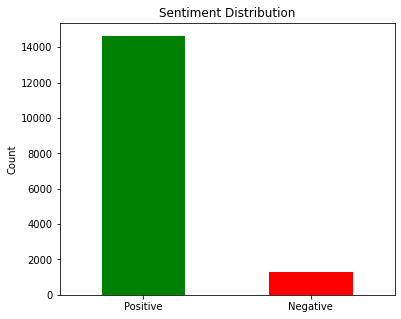

In [28]:
sentiment_counts=filtered_data["sentiment"].value_counts()
plt.figure(figsize=(6, 5))  # Adjust figure size as needed

sentiment_counts.plot(kind='bar', color=['green', 'red'])  # Green for positive, red for negative

plt.title("Sentiment Distribution")
#plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1], ["Positive","Negative"],rotation=0)
plt.show()

In [29]:
filtered_data["review"]=filtered_data["headline"]+" "+filtered_data["pros"]+" "+filtered_data["cons"]

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_19788\689596342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["review"]=filtered_data["headline"]+" "+filtered_data["pros"]+" "+filtered_data["cons"]


In [30]:
# Concatenate all reviews into one large text block
all_reviews = "\n\n".join(filtered_data['review'].tolist())

In [31]:
import os
from openai import OpenAI

client = OpenAI(
    api_key="add your open ai key",
)


def generate_summary_and_improvements(text, company):
    
    # Step 1: Generate summary
    response_summary = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f"Generate a summary for the following employee reviews from {company} company:\n\n{text}"
            }
        ],
        temperature=0.7,
    )
    
    summary = response_summary.choices[0].message.content
    
    # Step 2: Generate areas of improvement
    response_improvements = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f"Based on the employee reviews of {company}, provide key areas of improvement to enhance the employee experience in bullet points:\n\n{text}"
            }
        ],
        temperature=0.7,
    )
    
    improvements = response_improvements.choices[0].message.content
    
    return summary, improvements


# Generate summary and areas of improvement for the reviews
company_name = "Your Company Name"  # Replace with actual company name
summary, improvements = generate_summary_and_improvements(all_reviews[:4000], company_name)

print("Summary of Reviews:\n", summary)
print("\nAreas of Improvement:\n", improvements)

Summary of Reviews:
 well as the opportunity to collaborate with highly innovative individuals. The company offers fantastic perks and rewards, but sometimes the overwhelming workload and lack of clear direction can be challenging. Overall, employees enjoy working at Google and appreciate the amount of learning opportunities available. The diverse culture and smart people make it a great place to work, despite some minor drawbacks like a lack of work-life balance and difficulty being heard in such a large company.

Areas of Improvement:
  well as the collaborative culture. There are always new and innovative projects to work on. However, the work can sometimes be overwhelming and it's easy to feel directionless at times. 

Based on the employee reviews, key areas of improvement to enhance the employee experience at Your Company Name include:

1. Addressing the lack of work-life balance due to long hours and high expectations.
2. Improving communication and ensuring that employees feel 